#### Using new categorized salary data of selected companies.
#### edited on 11.16

## 1.1 What kind of jobs can get the highest salary in the current days?
#### salary range for categories

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import re
import seaborn as sns
from scipy import stats
import sys

In [4]:
data = pd.read_csv('./Scraper/SalaryScraper/fulltime_merged_salaries_company_table.csv')

In [33]:
groups = data.groupby('category')
eng = groups.get_group('engineering')
it = groups.get_group('it')
managerial = groups.get_group('managerial')
marketing = groups.get_group('marketing')
others = groups.get_group('others')
sales = groups.get_group('sales')

In [41]:
def salary_of_category(d):
    '''
    for all non-0 input
    return range of this category
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    return s

In [42]:
# Data frame of low / high salary
ave_eng = (salary_of_category(eng))
ave_it  = (salary_of_category(it))
ave_managerial  = (salary_of_category(managerial))
ave_marketing  = (salary_of_category(marketing))
ave_others  = (salary_of_category(others))
ave_sales  = (salary_of_category(sales))

In [61]:
# low / high average
salary_eng = ave_eng.sum()/len(ave_eng)
salary_it  = ave_it.sum()/len(ave_it)
salary_mana  = ave_managerial.sum()/len(ave_managerial)
salary_mk  = ave_marketing.sum()/len(ave_marketing)
salary_others = ave_others.sum()/len(ave_others)
salary_sales = ave_sales.sum()/len(ave_sales)

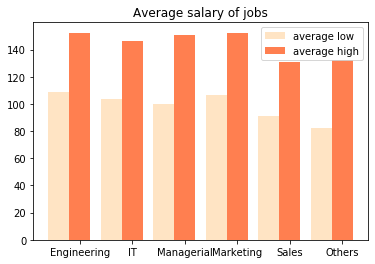

In [62]:
# plot graph
name_list = ['Engineering','IT','Managerial','Marketing', 'Sales', 'Others']
num_list1 = [salary_eng[0],salary_it[0],salary_mana[0],salary_mk[0],salary_others[0],salary_sales[0]]
num_list2 = [salary_eng[1],salary_it[1],salary_mana[1],salary_mk[1],salary_others[1],salary_sales[1]]
x =list(range(len(num_list1)))
total_width, n = 0.8, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'coral')
plt.legend()
plt.title('Average salary of jobs',fontsize='large')
plt.show()

### 1.2 The distribution of salary in each category

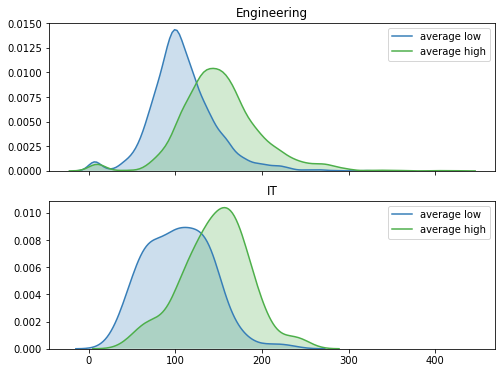

In [63]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_eng[0], label = 'average low', shade=True, color=c2, ax=ax1).set_title('Engineering')
sns.kdeplot(ave_eng[1], label = 'average high',shade=True, color=c3, ax=ax1)
sns.kdeplot(ave_it[0], label = 'average low', shade=True, color=c2, ax=ax2).set_title('IT')
sns.kdeplot(ave_it[1], label = 'average high',shade=True, color=c3, ax=ax2)

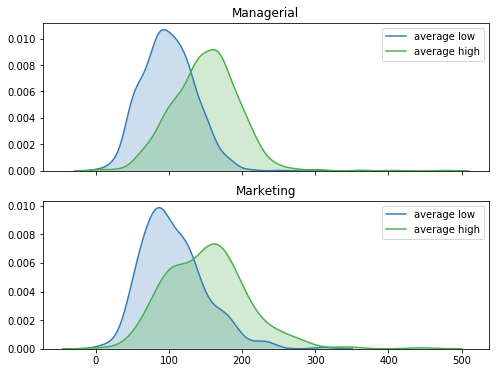

In [64]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_managerial[0], label = 'average low', shade=True, color=c2, ax=ax3).set_title('Managerial')
sns.kdeplot(ave_managerial[1], label = 'average high',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_marketing[0], label = 'average low', shade=True, color=c2, ax=ax4).set_title('Marketing')
sns.kdeplot(ave_marketing[1], label = 'average high',shade=True, color=c3, ax=ax4)

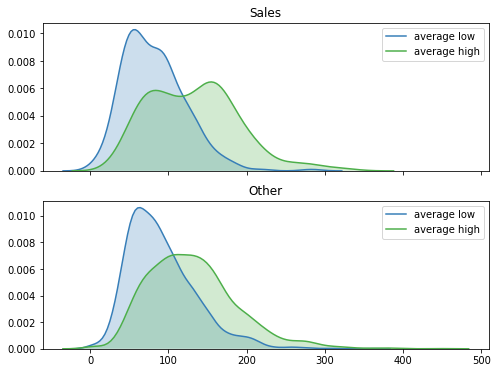

In [65]:
f, (ax3, ax4) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
c1, c2, c3 = sns.color_palette('Set1', 3)
sns.kdeplot(ave_sales[0], label = 'average low', shade=True, color=c2, ax=ax3).set_title('Sales')
sns.kdeplot(ave_sales[1], label = 'average high',shade=True, color=c3, ax=ax3)
sns.kdeplot(ave_others[0], label = 'average low', shade=True, color=c2, ax=ax4).set_title('Other')
sns.kdeplot(ave_others[1], label = 'average high',shade=True, color=c3, ax=ax4)

## 2. Which company pays more?
#### 2.1 Fulltime jobs. 

In [72]:
groups_company = data.groupby('company')
company_names = (list(groups_company.groups.keys()))
num_companies = len(company_names)

In [113]:
def salary_of_company(d):
    '''
    for all non-0 input
    return range of a certain company
    '''
    salary = d[d.salary_range.notnull()]['salary_range']
    s = salary.str.replace('K', '').str.replace('$', '').str.replace('€', '').str.replace("Range: ", '')
    s = s.apply(lambda x: pd.Series(x.split(' - '))) 
    s = s.astype('int')
    ave = s.sum()/len(s)
    return s, ave

In [114]:
average = []
salary_of_companies = []
for i in range (num_companies):
    company = company_names[i]
    com = groups_company.get_group(company)
    s, ave = salary_of_company(com)
    salary_of_companies.append(s)
    average.append(ave)

In [123]:
outcome = zip(company_names, salary_of_companies, average)

outcome = (list(outcome))

outcome = sorted(outcome, key = lambda x: x[2][1], reverse = True)

In [131]:
name_list = []
num_list1 = []
num_list2 = []
for j in range (num_companies):
    name_list.append(outcome[j][0])
    num_list1.append(outcome[j][2][0])
    num_list2.append(outcome[j][2][1])

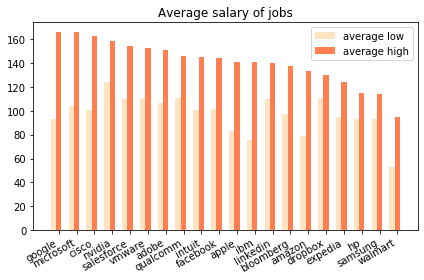

In [141]:
# plot graph
fig, ax = plt.subplots()
x =list(range(len(num_list1)))
total_width, n = 0.6, 2
width = total_width / n
plt.bar(x, num_list1, width=width, label='average low', color = 'bisque')
for i in range(len(x)):
    x[i] = x[i] + width
plt.bar(x, num_list2, width=width, label='average high', tick_label = name_list, color = 'coral')
plt.legend()
plt.title('Average salary of jobs',fontsize='large')
ax.xaxis_date()     # interpret the x-axis values as dates
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

#### 2.2 Which company pays more to intern jobs?